In [87]:
import numpy as np
import pandas as pd
import sqlalchemy
from tqdm.notebook import trange, tqdm

In [88]:
servername='piaba'
dbname='sca'
sqlcon = sqlalchemy.create_engine('mssql+pyodbc://@' + servername + '/' + dbname + '?driver=ODBC+Driver+13+for+SQL+Server')

In [89]:
notas = pd.read_sql(f"SELECT * FROM SCA_NotasFiscaisRecentes", sqlcon)

In [90]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Chave                    5619 non-null   object        
 1   Numero                   5619 non-null   float64       
 2   Serie                    5619 non-null   float64       
 3   Ano                      5619 non-null   int64         
 4   DataEmisao               5619 non-null   datetime64[ns]
 5   CodigoUJ                 5596 non-null   float64       
 6   NomeUJ                   5619 non-null   object        
 7   RazaoSocialDestinatario  5619 non-null   object        
 8   SegmentoFiscalizador     5418 non-null   object        
 9   Valor                    5619 non-null   float64       
 10  DetalheItens             5619 non-null   object        
 11  Ordem                    5619 non-null   int64         
dtypes: datetime64[ns](1), float64(4), 

In [91]:
notas.head()

,Chave,Numero,Serie,Ano,DataEmisao,CodigoUJ,NomeUJ,RazaoSocialDestinatario,SegmentoFiscalizador,Valor,DetalheItens,Ordem
0,NFe13230117417928000179550010000519851883111440,51985.0,1.0,2023,2023-01-26 16:41:11,1579.0,Secretaria de Justiça e Direitos Humanos de Pe...,SECRETARIA DE JUSTICA E DIREITOS HUMANOS - GOV...,DEDUC,7775.0,CONDICIONADOR DE AR SPLIT ECO TOP ECST12FR4-02...,6
1,NFe13230117417928000179550010000519851883111440,51985.0,1.0,2023,2023-01-26 16:41:11,1579.0,Secretaria de Justiça e Direitos Humanos de Pe...,SECRETARIA DE JUSTICA E DIREITOS HUMANOS - GOV...,GSEG,7775.0,CONDICIONADOR DE AR SPLIT ECO TOP ECST12FR4-02...,2
2,NFe13230117417928000179550010000520011695118713,52001.0,1.0,2023,2023-01-27 11:46:06,179.0,Fundo Municipal de Saúde de Caruaru,FUNDO MUNICIPAL DE SAUDE,IRBE,14468.0,CONDICIONADOR DE AR SPLIT INVERTER NEO ICS18F ...,3
3,NFe21230103526252000147558902330142331985760743,233014233.0,890.0,2023,2023-01-24 14:51:56,675.0,Prefeitura Municipal de Timbaúba,MATADOURO PUBLICO MUNICIPAL,GAON,44206.0,BOVINO MACHO DE 13 A 24 MESES,13
4,NFe21230103526252000147558902330142331985760743,233014233.0,890.0,2023,2023-01-24 14:51:56,675.0,Prefeitura Municipal de Timbaúba,MATADOURO PUBLICO MUNICIPAL,IRSU,44206.0,BOVINO MACHO DE 13 A 24 MESES,1


In [92]:
notas.DetalheItens

0       CONDICIONADOR DE AR SPLIT ECO TOP ECST12FR4-02...
1       CONDICIONADOR DE AR SPLIT ECO TOP ECST12FR4-02...
2       CONDICIONADOR DE AR SPLIT INVERTER NEO ICS18F ...
3                           BOVINO MACHO DE 13 A 24 MESES
4                           BOVINO MACHO DE 13 A 24 MESES
                              ...                        
5614                      DEFITELIO 80MG ML SOL INFUS X10
5615                      DEFITELIO 80MG ML SOL INFUS X10
5616                      DEFITELIO 80MG ML SOL INFUS X10
5617                      DEFITELIO 80MG ML SOL INFUS X10
5618                      DEFITELIO 80MG ML SOL INFUS X10
Name: DetalheItens, Length: 5619, dtype: object

In [93]:
df = notas.copy()

In [94]:
df.pop('SegmentoFiscalizador')
df.pop('Ordem')

0        6
1        2
2        3
3       13
4        1
        ..
5614     3
5615     5
5616     8
5617     3
5618     5
Name: Ordem, Length: 5619, dtype: int64

In [95]:
df = df.drop_duplicates()

# EDA

In [96]:
df.groupby(['Serie', 'Numero'])['DetalheItens'].count().sort_values()

Serie  Numero 
0.0    29.0       1
1.0    31484.0    1
       31487.0    1
       31488.0    1
       31489.0    1
                 ..
       45.0       4
       46.0       4
       50.0       4
       38.0       5
       449.0      5
Name: DetalheItens, Length: 2903, dtype: int64

In [97]:
df.groupby(['NomeUJ'])['DetalheItens'].count().sort_values()

NomeUJ
Upe Campus Petrolina                                  1
Fundo Municipal de Saúde de Camocim de São Félix      1
Prefeitura Municipal de Orobó                         1
Fundo Municipal de Saúde de Catende                   1
Fundo Municipal de Saúde de Chã Grande                1
                                                   ... 
Secretaria de Saúde de Pernambuco                    77
Fundo Municipal de Saúde do Recife                   81
Secretaria de Defesa Social de Pernambuco           101
Companhia Pernambucana de Saneamento                162
Prefeitura da Cidade do Recife                      247
Name: DetalheItens, Length: 530, dtype: int64

In [98]:
df.groupby(['NomeUJ'])['Valor'].sum().sort_values()

NomeUJ
Núcleo de Apoio Administrativo - Safi                                                  11.00
Fundo Previdenciario do Município de Santa Filomena                                    85.00
Fundo Previdenciário do Município de Betânia                                           89.70
Fundo Previdenciário do Município de Condado                                          110.00
Instituto de Previdência dos Servidores Municipais de Cachoeirinha                    134.38
                                                                                    ...     
Companhia Pernambucana de Gás                                                     6007129.98
Companhia Pernambucana de Saneamento                                              7085560.72
Laboratório Farmacêutico do Estado de Pernambuco Governador Miguel Arraes S/A    11015301.09
Secretaria de Saúde de Pernambuco                                                13552186.38
Prefeitura da Cidade do Recife                                 

In [99]:
df[['NomeUJ', 'Numero', 'DetalheItens','Valor']].sort_values('Valor').drop_duplicates()

,NomeUJ,Numero,DetalheItens,Valor
5000,Secretaria de Educação e Esportes de Pernambuco,872.0,"Educa 7 Ano - - INDEFINIDO, Educa 9 Ano - - IN...",0.04
855,Associação Municipalista de Pernambuco,1905.0,AGUA MINERAL S/GAS,5.50
2265,Secretaria de Saúde de Pernambuco,2269.0,OXIGENIO MEDICINAL CARGA CIL G .,6.29
4373,Fundo Previdenciário do Município de Betânia,1718.0,AGUA MINERAL RARA 20LT,7.50
2249,Hospital Otávio de Freitas,1198.0,CARGA O2 GRAB'N GO VIPROXY,10.08
...,...,...,...,...
5091,Secretaria de Saúde de Pernambuco,229782.0,GANVIRAX 250 MG C/ 40 CÁPSULAS,1456400.00
4520,Secretaria de Defesa Social de Pernambuco,59436.0,"UDP DATEN DC3E-S AMD ATHLON WIN10 PRO, TECLADO...",1816500.00
5073,Laboratório Farmacêutico do Estado de Pernambu...,3515352.0,DUPLA 300mg + 300mg Com. Rev. - 1fr X 30 (MIN ...,2688518.10
5079,Laboratório Farmacêutico do Estado de Pernambu...,3515354.0,DUPLA 300mg + 300mg Com. Rev. - 1fr X 30 (MIN ...,2870309.70


In [100]:
notas.groupby(['SegmentoFiscalizador'])['DetalheItens'].count().sort_values()

SegmentoFiscalizador
NAE         2
GATI        2
DPLTI       3
GATI2       3
GEDU1      18
GHAB       20
GETA       34
GTGF       46
GTRAM      50
GEDU2      68
GCID       83
GPREV      94
GFPE       98
GEDE      161
IRGA      166
GEMS      168
GSAU2     174
IRPA      177
GSAM      180
GDAO      181
GSAU1     183
GEMN      184
IRPE      185
IRSU      185
IRAR      188
GAOS      188
GEGM      196
DESAU     196
DMACRO    199
GSEG      199
DEDUC     200
GAON      200
DREGIO    200
GDAL      200
NEG       200
IRBE      201
GAOP      204
DINFRA    382
Name: DetalheItens, dtype: int64

In [101]:
notas.groupby(['SegmentoFiscalizador'])['Valor'].sum().sort_values()

SegmentoFiscalizador
NAE            476.50
GATI           476.50
DPLTI         3280.34
GATI2         3280.34
GHAB          5809.16
GETA         45487.92
GTRAM        84629.56
GTGF        182953.58
GPREV       222452.28
GCID        418385.59
GEDU1       666058.87
GFPE       1038647.80
GEDU2      2262393.25
IRSU       4590688.68
GSAU2      4657184.37
IRGA       5220171.43
GSEG       5915769.53
IRBE       6196906.12
IRAR       6571100.72
IRPA       7361579.40
IRPE       7709511.82
DEDUC      8888850.07
GEGM       9599223.50
GEMS      10267720.40
DMACRO    10880451.95
GEMN      11035752.47
GSAM      13067690.70
GSAU1     13143994.12
GEDE      13376574.44
GAON      19209159.38
GAOS      20218874.54
GDAO      20427102.39
GAOP      28839003.83
DESAU     29137084.72
DREGIO    32181297.76
DINFRA    44795753.54
NEG       45730009.42
GDAL      64981795.24
Name: Valor, dtype: float64

# FE

In [102]:
df['dia'] = df.DataEmisao.dt.day
df['dia_semana'] = df.DataEmisao.dt.dayofweek
df['data'] = df.DataEmisao.dt.date
df['mes'] = df.DataEmisao.dt.month
df['ano'] = df.DataEmisao.dt.year
df['hora'] = df.DataEmisao.dt.hour
df['minuto'] = df.DataEmisao.dt.minute
df['horario'] = df.DataEmisao.dt.time

In [114]:
df['DetalheItens'] = df.DetalheItens.str.lower() 
df['len'] = df.DetalheItens.str.len()

In [115]:
df[['DetalheItens','len','Valor']].sort_values('len')

,DetalheItens,len,Valor
3309,glp,3,2543.64
3820,glp,3,4515.00
2716,pneu,4,31689.72
308,pneu,4,18295.56
307,pneu,4,15734.04
...,...,...,...
1877,"cal hidratada, branca, em po para pintura, sac...",5919,46268.01
366,"alcool etilico 70% gel 100ml, alcool etilico 9...",5959,131829.20
368,"cartao para rx c01 furo, preservativo feminino...",5959,131829.20
544,"tira reagente para medir glicemia capilar, ali...",8500,195416.52


In [131]:
df.loc[363]['DetalheItens']

'alimento para nutricao enteral eou oral infantil 1-10 anos, a base de peptidios,sacarose, proteinas do soro do leite, vi, alimento para nutricao enteral eou oral infantil 1-10 anos, a base de peptidios,sacarose, proteinas do soro do leite, vi, alimento para nutricao enteral eou oral infantil 1-10 anos, a base de peptidios,sacarose, proteinas do soro do leite, vi, formula nutricionalmente completo 100% proteina de soja acrescido de fibras.isenta de sacarose lactose e gluten, 800g, suplemento nutricional, pacientes com doenca de crohn, 14% proteina, vitaminas e minerais, isento de lactose, gluten e s, suplemento nutricional, pacientes com doenca de crohn, 14% proteina, vitaminas e minerais, isento de lactose, gluten e s, alcool 70% gel 500ml, hipoclorito de sodio 2,0 a 2,5 % solucao 50 ml, hipoclorito de sodio 2,0 a 2,5 % solucao 50 ml, acido acetico 3% 1000 ml, nicotina 2 mg goma de mascar, nicotina 2 mg goma de mascar, rifampicina 300 mg capsula, varfarina sodica 5mg comp, clorexidina

In [129]:
df.loc[366]['DetalheItens']

'alcool etilico 70% gel 100ml, alcool etilico 99,5% solucao 1000ml, alcool etilico 99,5% solucao 1000ml, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, cloro 2% 5 litros, heparina sodica 5000 uiml sol. inj. 5ml, vancomicina 500 mg po p sol. injetavel, cefepima,  cloridrato 1 g po para sol. injetavel, metoclopramida, clorid 5mgml sol inj 1ml, ceftriaxona sodica 1g po para sol. inj. iv 10ml, ondansetrona, cloridrato 2 mgml sol. inj. 4 ml, lidocaina cloridrato 20mgml sol inj 20ml svaso, clorexidina digluconato, 0,5% sol alcoolica 1l, acido valproico (valproato de sodio) 50mgml xarope 100ml, adenosina, fosfato 3mgml sol. inj. 2ml, insulina humana regular 100 uiml solucao injetavel 3 ml, nitroprusseto de sodio 50mg po liofilizado para sol. inj. 2ml, norepinefrina 2 mgml sol. inj. 4 ml, compressa campo operatorio - 25cm x 28cm, compressa campo operato

In [130]:
df.loc[366]

Chave                        NFe26230105366444002617550000000214311900134128
Numero                                                               21431.0
Serie                                                                    0.0
Ano                                                                     2023
DataEmisao                                               2023-01-26 12:42:02
CodigoUJ                                                               319.0
NomeUJ                       Prefeitura Municipal do Jaboatão dos Guararapes
RazaoSocialDestinatario                          SMS JABOATAO DOS GUARARAPES
Valor                                                               131829.2
DetalheItens               alcool etilico 70% gel 100ml, alcool etilico 9...
dia                                                                       26
dia_semana                                                                 3
data                                                              2023-01-26

In [160]:
produtos =  pd.DataFrame()
for nota in df[:1000].iterrows():
    for prod in  nota[1]['DetalheItens'].split(','):
        tmp = pd.Series({'Serie': nota[1]['Serie'], 'Numero': nota[1]['Numero'], 'DetalheItens': prod})
        # produtos = produtos.append(tmp,ignore_index=True)
        produtos = pd.concat([produtos,tmp], axis=1)
produtos

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Serie,1.0,1.0,1.0,890.0,890.0,890.0,890.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Numero,51985.0,52001.0,52001.0,233014233.0,233014239.0,233014248.0,233017333.0,62697.0,62697.0,62697.0,...,19523.0,19523.0,19523.0,19523.0,19523.0,19523.0,19523.0,19523.0,19523.0,19523.0
DetalheItens,condicionador de ar split eco top ecst12fr4-02...,condicionador de ar split inverter neo ics18f ...,condicionador de ar split eco top ecst12qfr4-...,bovino macho de 13 a 24 meses,bovino macho de 13 a 24 meses,bovino macho de 13 a 24 meses,bovino macho de 13 a 24 meses,compressa de gaze 13f 7,5x7,5cm 160g-ultra te,...,sonda uretral n. 18,scalp n. 25,sonda nasogastrica longa n. 16,mascara p/ nebulizacao infantil (micronebuliz...,sonda uretral n. 16,mascara p/ nebulizacao adulto (micronebulizador),sonda uretral n. 06,sonda uretral n. 04,sonda nasogastrica longa n. 10,sonda nasogastrica longa n. 04


In [163]:
produtos.T.to_csv('produtos.csv')

In [165]:
produtos = produtos.T

In [169]:
produtos.drop_duplicates()

,Serie,Numero,DetalheItens
0,1.0,51985.0,condicionador de ar split eco top ecst12fr4-02...
0,1.0,52001.0,condicionador de ar split inverter neo ics18f ...
0,1.0,52001.0,condicionador de ar split eco top ecst12qfr4-...
0,890.0,233014233.0,bovino macho de 13 a 24 meses
0,890.0,233014239.0,bovino macho de 13 a 24 meses
...,...,...,...
0,1.0,19523.0,mascara p/ nebulizacao adulto (micronebulizador)
0,1.0,19523.0,sonda uretral n. 06
0,1.0,19523.0,sonda uretral n. 04
0,1.0,19523.0,sonda nasogastrica longa n. 10


# Visualizacao

<AxesSubplot:xlabel='data'>

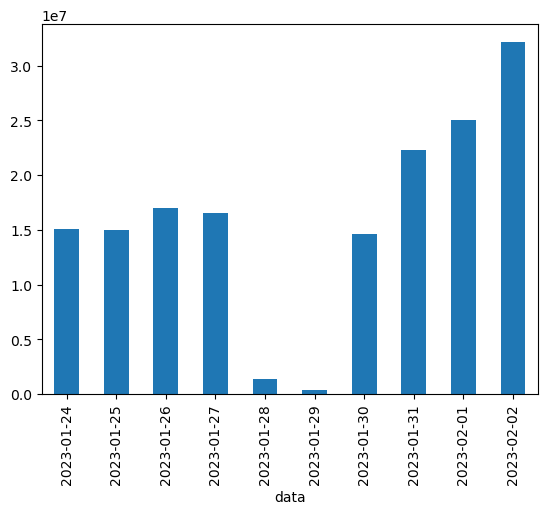

In [104]:
df.groupby(['data'])['Valor'].sum().plot.bar()

<AxesSubplot:xlabel='hora'>

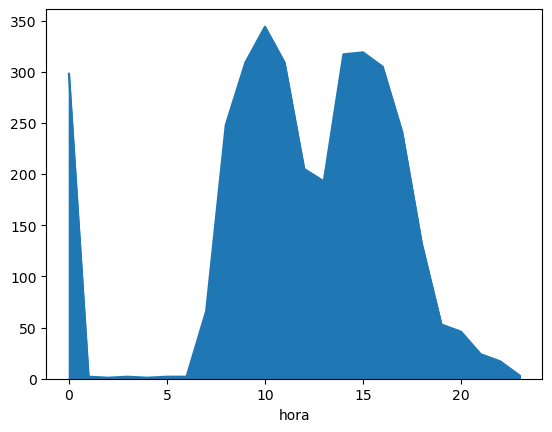

In [105]:
df.groupby(['hora'])['Valor'].count().plot.area()

In [106]:
df.sort_values('hora')

,Chave,Numero,Serie,Ano,DataEmisao,CodigoUJ,NomeUJ,RazaoSocialDestinatario,Valor,DetalheItens,dia,dia_semana,data,mes,ano,hora,minuto,horario,len
3703,NFe26230208258424000162550030000108881200938009,10888.0,3.0,2023,2023-02-01 00:00:00,493.0,Prefeitura da Cidade do Recife,PREFEITURA DO RECIFE,1698.60,"MARCADOR P/Q.BR WBMA AZ C/12 PILOT, PAPEL OFFP...",1,2,2023-02-01,2,2023,0,0,00:00:00,<bound method StringMethods.len of <pandas.cor...
2497,NFe26230126889181000142550020000026221000105383,2622.0,2.0,2023,2023-01-24 00:00:00,701.0,Prefeitura Municipal de Venturosa,MUNICIPIO DE VENTUROSA,11450.00,"TONNER P/ IMPRESSORA HP, TINTA PRETA 70ML, TIN...",24,1,2023-01-24,1,2023,0,0,00:00:00,<bound method StringMethods.len of <pandas.cor...
1862,NFe26230117238558000102550010000042181120519833,4218.0,1.0,2023,2023-01-31 00:00:00,1534.0,Fundo Municipal de Educação dos Palmares,FUNDO MUNICIPAL DE EDUCACAO DOS PALMARES,60200.60,"SABONETE INFANTIL LIQ 5L UND, ALCOOL 70% 1L, S...",31,1,2023-01-31,1,2023,0,0,00:00:00,<bound method StringMethods.len of <pandas.cor...
2490,NFe26230126764346000150550010000093091106086987,9309.0,1.0,2023,2023-01-24 00:00:00,1962.0,Instituto de Previdência Social dos Servidores...,INST. PREVID SOC DOS SERV PUBL.DO MUNIC OLINDA-PE,672.00,DETERGENTE ALCALINO VORAZ CLORADO AE C/ 5 LTS ...,24,1,2023-01-24,1,2023,0,0,00:00:00,<bound method StringMethods.len of <pandas.cor...
1861,NFe26230117238558000102550010000042141120519834,4214.0,1.0,2023,2023-01-27 00:00:00,437.0,Fundo Municipal de Saúde de Palmeirina,FUNDO MUNICIPAL DE SAUDE DE PALMEIRINA,19891.40,"FILE DE PEIXE, FEIJAO DA CASA CARIOCA FRD 30K...",27,4,2023-01-27,1,2023,0,0,00:00:00,<bound method StringMethods.len of <pandas.cor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,NFe35230112420164000157550010010767131569581548,1076713.0,1.0,2023,2023-01-30 22:20:00,179.0,Fundo Municipal de Saúde de Caruaru,FUNDO MUNICIPAL DE SAUDE,14791.92,"ESPARADRAPO 10CMX4,5M PROCITEX CREMER, ESPARAD...",30,0,2023-01-30,1,2023,22,20,22:20:00,<bound method StringMethods.len of <pandas.cor...
4005,NFe26230216987160000106550010000025361753842243,2536.0,1.0,2023,2023-02-02 22:29:07,1003.0,Secretaria de Defesa Social de Pernambuco,SECRETARIA DE DEFESA SOSCIAL,9620.00,"REP BICO INJETOR, REP BOMBA INJETORA, ANEL DE ...",2,3,2023-02-02,2,2023,22,29,22:29:07,<bound method StringMethods.len of <pandas.cor...
4007,NFe26230216987160000106550010000025391259115141,2539.0,1.0,2023,2023-02-02 23:10:52,1003.0,Secretaria de Defesa Social de Pernambuco,SECRETARIA DE DEFESA SOSCIAL,2742.00,"KIT CORRENTE COMANDO, OLEO MOTOR, TUBO DA BOMB...",2,3,2023-02-02,2,2023,23,10,23:10:52,<bound method StringMethods.len of <pandas.cor...
4067,NFe26230219450370000159550010000021051406621796,2105.0,1.0,2023,2023-02-01 23:47:38,260.0,Prefeitura Municipal de Gravatá,MUNICIPIO DE GRAVATA,33735.00,PAPEL A4 PCT/ C 500 FOLHAS REPORT,1,2,2023-02-01,2,2023,23,47,23:47:38,<bound method StringMethods.len of <pandas.cor...
